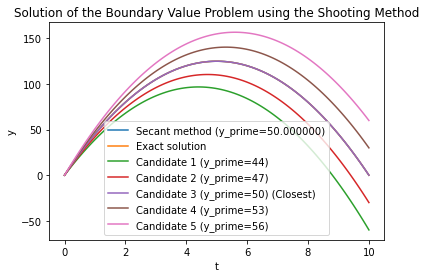

The closest y(10) to 0 is at y_prime = 50.000000


In [19]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import root_scalar
import matplotlib.pyplot as plt

g = 10
t1 = 10

# Function representing the first-order differential equations
def f(t, y):
    return y[1], -g

# Exact solution
def y_exact(t):
    return -g*(t**2)/2 + g*t1*t/2

# Function to solve the initial value problem
def solve_bvp(y_prime_guess):
    t_span = (0, t1)
    y0 = [0, y_prime_guess]
    sol = solve_ivp(f, t_span, y0, t_eval=np.linspace(0, t1, 100))
    return sol.y[0][-1]  # Return the value of y at t=t1

# Function to find the difference between y(t1) and the target value (0)
def target_function(y_prime_guess):
    return solve_bvp(y_prime_guess)

# Use root_scalar to find the root of the target function
result = root_scalar(target_function, method='secant', x0=44, x1=56)

# Solve the initial value problem using the closest y_prime value
closest_y_prime = result.root
y = solve_ivp(f, (0, t1), [0, closest_y_prime], t_eval=np.linspace(0, t1, 100)).y[0]

# Plot the exact solution, the solution from the secant method, and the candidate solutions
y_candidates = []
y_candidates_diff = []
for y_prime_guess in [44, 47, 50, 53, 56]:
    y_candidate = solve_ivp(f, (0, t1), [0, y_prime_guess], t_eval=np.linspace(0, t1, 100)).y[0]
    y_candidates.append(y_candidate)
    y_candidates_diff.append(np.abs(y_candidate[-1]))

y_candidates_diff = np.array(y_candidates_diff)
idx_closest = np.argmin(y_candidates_diff) #using numpy.argmin

plt.figure()
plt.plot(np.linspace(0, t1, 100), y, label=f"Secant method (y_prime={closest_y_prime:.6f})")
plt.plot(np.linspace(0, t1, 100), y_exact(np.linspace(0, t1, 100)), label="Exact solution")
for i, y_candidate in enumerate(y_candidates):
    label = f"Candidate {i+1} (y_prime={3*i+44})"
    if i == idx_closest:
        label += " (Closest)"
    plt.plot(np.linspace(0, t1, 100), y_candidate, label=label)
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.title('Solution of the Boundary Value Problem using the Shooting Method')
plt.show()

print(f"The closest y({t1}) to 0 is at y_prime = {closest_y_prime:.6f}")
